## Intro


I love going to the Gym, however, I hate it when it's crowded because I cannot follow my plan at my rythm. I often have to wait for the machine I need to free up, and it becomes next to impossible to follow my routine.

Because of this, I decided to build a predictive model using Machine Learninhg, especifically a linear regressor using Stochastic Gradient Decsent.

Using a dataset with over 60,000 observations and 11 featres including day, hour, temperature and other details, I will be creating a model that can predict how many people will be at the gym at a particular day and time. That way, I will be able to enjoy my excersise routine without waiting times.

In the dataset we have the following observations:

- number_people: this is the number of people at the gym at each observation. This will be our target variable or label.
- date: a string value with the specific date and time information.
- timestamp: an integer (int), with the number of seconds since the start of the day (00:00).
- dayofweek: an integer (int). 0 is equal to Monday and 6 is equal to Sunday.
- is_weekend: a Boolean value defining if this observation happened during a weekend. 1 for yes, 0 for no.
- is_holiday: a Boolean value defining if the observation happened during a holiday. 1 for yes, 0 for no.
- temperature: a float, defining the temperature during the day of the observation in Fahrenheit.
- isstartof_semester: a Boolean defining if the observation happened in the first 2 weeks of a semester. 1 for yes, 0 for no.
- is_during_semester: a Boolean defining if the observation happened during the active semester. 1 for yes, 0 for no.
- month: an integer (int) defining the month of the year. 1 is equal to January, 12 is equal to December.
- hour: an integer (int) for the hour of the day from 0 to 23.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [2]:
gym=pd.read_csv('crowdness_gym_data.csv')
gym.head()

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


# EDA and Cleaning the Data


In [3]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


In [4]:
gym.isnull().sum()

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

Based on the previous two cells we cann see that there are no missing values in the dataset

In [5]:
gym.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
number_people,62184.0,29.072543,22.689026,0.00,9.0,28.00,43.00,145.00
timestamp,62184.0,45799.437958,24211.275891,0.00,26624.0,46522.50,66612.00,86399.00
day_of_week,62184.0,2.982504,1.996825,0.00,1.0,3.00,5.00,6.00
is_weekend,62184.0,0.282870,0.450398,0.00,0.0,0.00,1.00,1.00
is_holiday,62184.0,0.002573,0.050660,0.00,0.0,0.00,0.00,1.00
temperature,62184.0,58.557108,6.316396,38.14,55.0,58.34,62.28,87.17
is_start_of_semester,62184.0,0.078831,0.269476,0.00,0.0,0.00,0.00,1.00
is_during_semester,62184.0,0.660218,0.473639,0.00,0.0,1.00,1.00,1.00
month,62184.0,7.439824,3.445069,1.00,5.0,8.00,10.00,12.00
hour,62184.0,12.236460,6.717631,0.00,7.0,12.00,18.00,23.00


It all looks fairly straighforward. The date column, as it is an object, has no statistics, and the timestamp seems to be wierd to work with. Most of the others seem good, with some of the features like is_holiday and is_weekend being binary features.

Based on everythign we see we can at the very least remove the date column. The reason we can remove the date column is that because in the dataset we have other column that can help us retrieve days and other dates such as holidays and if it is weekend or not. 

In [6]:
gym=gym.drop('date',axis=1)
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   timestamp             62184 non-null  int64  
 2   day_of_week           62184 non-null  int64  
 3   is_weekend            62184 non-null  int64  
 4   is_holiday            62184 non-null  int64  
 5   temperature           62184 non-null  float64
 6   is_start_of_semester  62184 non-null  int64  
 7   is_during_semester    62184 non-null  int64  
 8   month                 62184 non-null  int64  
 9   hour                  62184 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 4.7 MB


[Text(0, 0, '8838'),
 Text(0, 0, '9130'),
 Text(0, 0, '8981'),
 Text(0, 0, '8926'),
 Text(0, 0, '8719'),
 Text(0, 0, '8822'),
 Text(0, 0, '8768')]

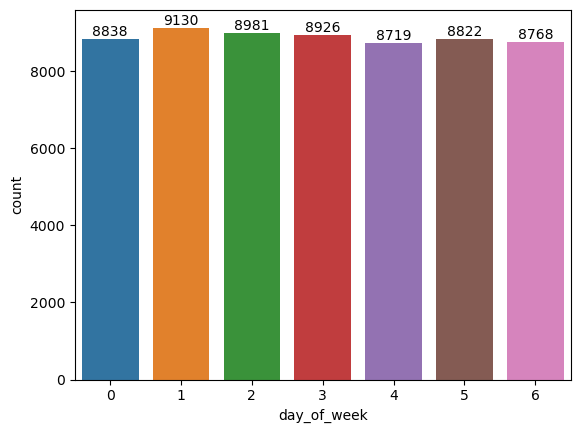

In [7]:
ax=sns.countplot(x=gym["day_of_week"])
ax.bar_label(ax.containers[0])

Based on the plot above we can see 1 (ie Tuesday) has the most observation which is 9130. Bu tthe observation are relataively close enough with each others.

[Text(0, 0, '4046'),
 Text(0, 0, '3587'),
 Text(0, 0, '4333'),
 Text(0, 0, '2747'),
 Text(0, 0, '4230'),
 Text(0, 0, '3940'),
 Text(0, 0, '4447'),
 Text(0, 0, '6089'),
 Text(0, 0, '6914'),
 Text(0, 0, '7264'),
 Text(0, 0, '7110'),
 Text(0, 0, '7477')]

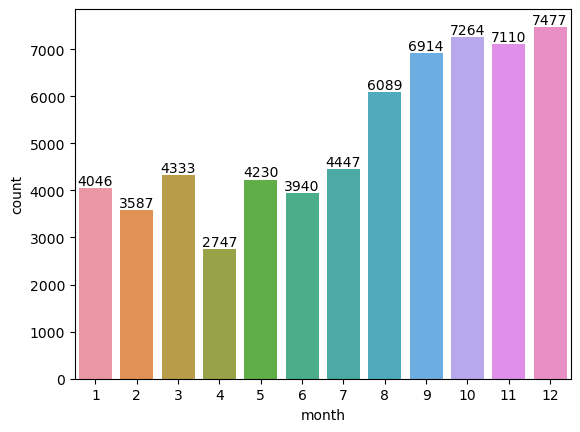

In [8]:
ax=sns.countplot(x=gym["month"])
ax.bar_label(ax.containers[0])

Here we can see that December and January are the months with the most observations, probably because they are the most popular months to go to the gym. We can also see more obervations at the begining of the semester (August), then at the end, probably because everyone is very excited at the beguning and very busy at the end (March, April).

[Text(0, 0, '2978'),
 Text(0, 0, '1782'),
 Text(0, 0, '1520'),
 Text(0, 0, '1517'),
 Text(0, 0, '1437'),
 Text(0, 0, '2441'),
 Text(0, 0, '2758'),
 Text(0, 0, '2791'),
 Text(0, 0, '2798'),
 Text(0, 0, '2799'),
 Text(0, 0, '2796'),
 Text(0, 0, '2791'),
 Text(0, 0, '2805'),
 Text(0, 0, '2812'),
 Text(0, 0, '2787'),
 Text(0, 0, '2778'),
 Text(0, 0, '2808'),
 Text(0, 0, '2911'),
 Text(0, 0, '2837'),
 Text(0, 0, '2819'),
 Text(0, 0, '2795'),
 Text(0, 0, '2779'),
 Text(0, 0, '2775'),
 Text(0, 0, '2870')]

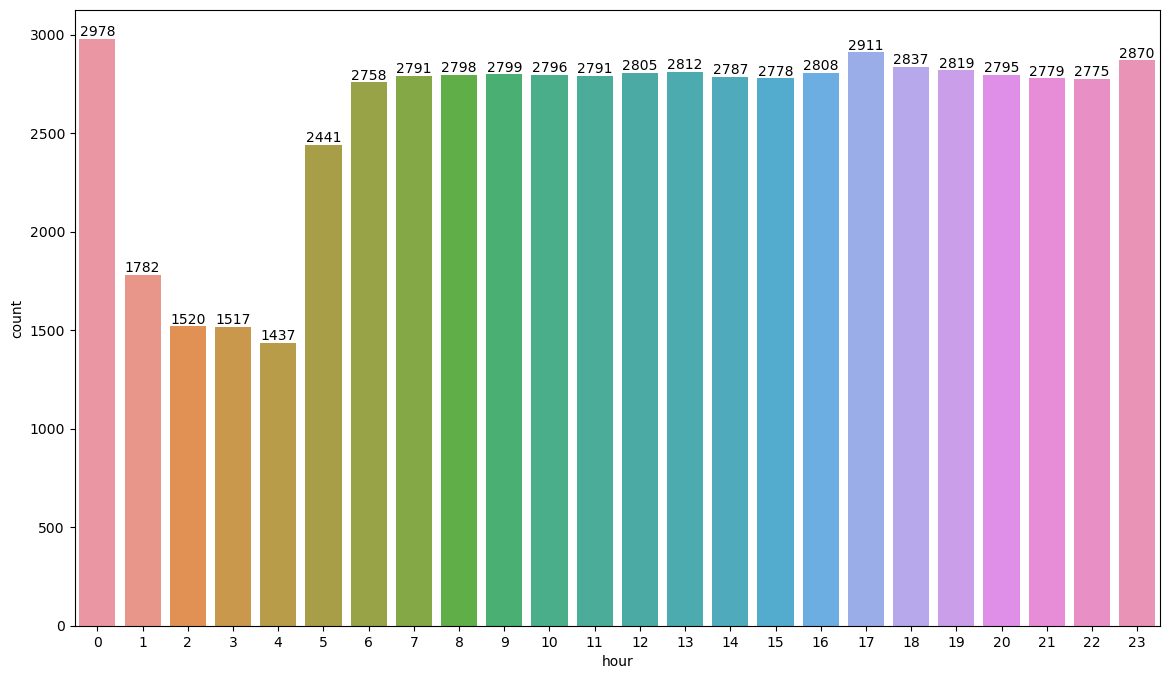

In [9]:
plt.figure(figsize=(14, 8))
ax=sns.countplot(x=gym["hour"])
ax.bar_label(ax.containers[0])

Based on the graph we can see that most poeple like goning to the gym later in the day or very early. This can can be to due to the fact that most people will go after/before work. What was really surprising is the number of people that go to the gym a midnight.


Since we did some plot to determine if there is anything interesting that we can find, we now need to see what relationship every observation has with each other

In [10]:
gym.corr()

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
number_people,1.000000,0.550218,-0.162062,-0.173958,-0.048249,0.373327,0.182683,0.335350,-0.097854,0.552049
timestamp,0.550218,1.000000,-0.001793,-0.000509,0.002851,0.184849,0.009551,0.044676,-0.023221,0.999077
day_of_week,-0.162062,-0.001793,1.000000,0.791338,-0.075862,0.011169,-0.011782,-0.004824,0.015559,-0.001914
is_weekend,-0.173958,-0.000509,0.791338,1.000000,-0.031899,0.020673,-0.016646,-0.036127,0.008462,-0.000517
is_holiday,-0.048249,0.002851,-0.075862,-0.031899,1.000000,-0.088527,-0.014858,-0.070798,-0.094942,0.002843
temperature,0.373327,0.184849,0.011169,0.020673,-0.088527,1.000000,0.093242,0.152476,0.063125,0.185121
is_start_of_semester,0.182683,0.009551,-0.011782,-0.016646,-0.014858,0.093242,1.000000,0.209862,-0.137160,0.010091
is_during_semester,0.335350,0.044676,-0.004824,-0.036127,-0.070798,0.152476,0.209862,1.000000,0.096556,0.045581
month,-0.097854,-0.023221,0.015559,0.008462,-0.094942,0.063125,-0.137160,0.096556,1.000000,-0.023624
hour,0.552049,0.999077,-0.001914,-0.000517,0.002843,0.185121,0.010091,0.045581,-0.023624,1.000000


This table gives is a sense of the correlation (positive or negative), between each factor and each other variable. Since we are mostly interested in the number of people, we can stick to the first column of the table.

We cans see how the hour, temperature and interestingly the is_during_semester variables have the largest weight. Also we can see that the timestamp and hour variables have a very similar weight, wich means they could be redundant.

Other variables have weaker correlations as well, like is_weekend and day_of_week are negatively correlated which is very interesting.

In [11]:
#only gives a breif summary
correlation_mat = gym.corr()
corr_pairs = correlation_mat.unstack()
sorted_pairs = corr_pairs.sort_values(kind="quicksort")
print(sorted_pairs)

number_people  is_weekend             -0.173958
is_weekend     number_people          -0.173958
day_of_week    number_people          -0.162062
number_people  day_of_week            -0.162062
month          is_start_of_semester   -0.137160
                                         ...   
is_weekend     is_weekend              1.000000
day_of_week    day_of_week             1.000000
timestamp      timestamp               1.000000
month          month                   1.000000
hour           hour                    1.000000
Length: 100, dtype: float64


In [12]:
#full summary of correaltions
correlation_mat[correlation_mat < 1].unstack().transpose().sort_values(kind="quicksort", ascending=False).drop_duplicates()

hour                  timestamp               0.999077
is_weekend            day_of_week             0.791338
number_people         hour                    0.552049
                      timestamp               0.550218
temperature           number_people           0.373327
is_during_semester    number_people           0.335350
is_start_of_semester  is_during_semester      0.209862
temperature           hour                    0.185121
timestamp             temperature             0.184849
is_start_of_semester  number_people           0.182683
is_during_semester    temperature             0.152476
                      month                   0.096556
temperature           is_start_of_semester    0.093242
                      month                   0.063125
is_during_semester    hour                    0.045581
                      timestamp               0.044676
is_weekend            temperature             0.020673
day_of_week           month                   0.015559
temperatur

<AxesSubplot:>

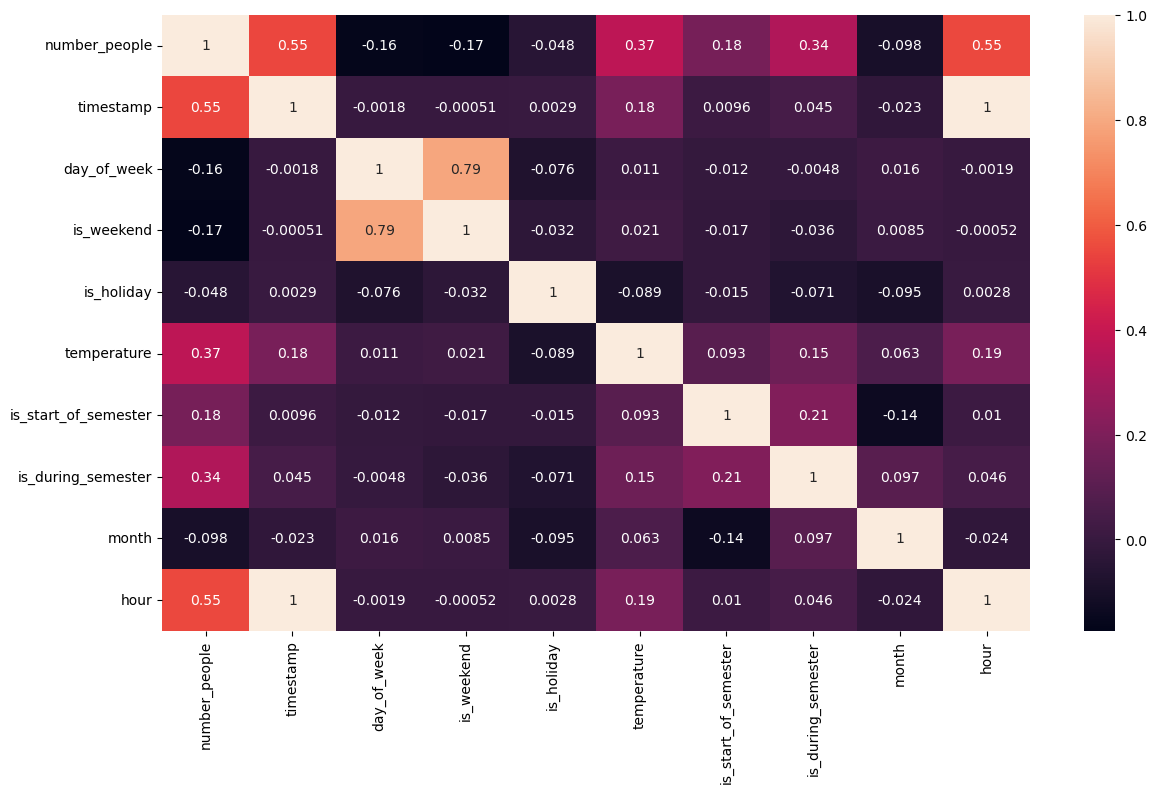

In [13]:
plt.figure(figsize=(14, 8))
sns.heatmap(gym.corr(), annot=True)

This simply confirms our previous suspicions, that temperature, hour and is_during_semester variables are the most important.

Another thing, the timestamp seems to be redundant, since it has the same correlation as the hour, and we already have all the information on the month, day and time. So I will remove the timestamp column before moving on to building the model.

Also, check with .head() to make sure the column was removed.

In [14]:
gym=gym.drop('timestamp',axis=1)
gym.head()

,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,71.76,0,0,8,17
1,45,4,0,0,71.76,0,0,8,17
2,40,4,0,0,71.76,0,0,8,17
3,44,4,0,0,71.76,0,0,8,17
4,45,4,0,0,71.76,0,0,8,17


# Preparing to Build Our Model

Now that the dataset is ready and we have our features, I need to import the tools needed to build the model. In this case, from the Scikit Lean library, the train_test_split and SGDRegressor.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [16]:
X=gym.drop('number_people',axis=1)
X.head()

,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,4,0,0,71.76,0,0,8,17
1,4,0,0,71.76,0,0,8,17
2,4,0,0,71.76,0,0,8,17
3,4,0,0,71.76,0,0,8,17
4,4,0,0,71.76,0,0,8,17


In [17]:
y = gym['number_people'] 
y.head()

0    37
1    45
2    40
3    44
4    45
Name: number_people, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Check to make sure the shape of each set is correct.

In [19]:
print(f"Training features shape: {X_train.shape}")
print(f"Testing features shape: {X_test.shape}")
print(f"Training label shape: {y_train.shape}")
print(f"Testing label shape: {y_test.shape}")

Training features shape: (43528, 8)
Testing features shape: (18656, 8)
Training label shape: (43528,)
Testing label shape: (18656,)


Build the model object with SGDRegressor. Setting the learning rate to optimal, the loss function to hubber loss and using elasticnet for the penalty.

The fitting the model with the training data. I set the random_state so as to be able to reproduce the training.

In [20]:
sgd_v1 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)

In [21]:

sgd_v1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

## Measure the Performance of the Mode
Now that we have trained our model, it is time to predict the target variable with the test data. I will be using Mean Squared Error, Mean Absolute Error and R Sqared.

In [22]:
y_pred_v1 = sgd_v1.predict(X_test)  # Predict labels

In [23]:
# Let's evaluate the performance of the model.

from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v1),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_test, y_pred_v1),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v1),3)}")

Mean squared error: 263.537
R2 score: 0.49
Mean absolute error: 12.14


Mean Squared Error and Mean Absolute Error are fairly high (the closer to 0 the higher the accuracy), meaning the model is not incredibly accurate. With the R2 Score we can see there is a correlation of 0.49, wich is not terrible, but not that good either since we want it to be as close to 1 as possible.

To try and imprive the model, we can scale the features to normalize them from -1 to 1, this mught help improve the model.

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
sgd_v2 = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber', 
    penalty='elasticnet', random_state = 52)

In [26]:
sgd_v2.fit(X_train_scaled, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

In [27]:
y_pred_v2 = sgd_v2.predict(X_test_scaled)  # Predict labels

In [28]:
# The mean squared error
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_v2),3)}")
# Explained variance score: 1 is perfect prediction
print(f"R2 score: {round(r2_score(y_test, y_pred_v2),3)}")
# Mean Absolute Error
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_v2),3)}")

Mean squared error: 255.754
R2 score: 0.505
Mean absolute error: 12.056


With the scaled data, the model performs slightly better

